In [11]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import time

In [13]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# MNISTの場合，60000が学習，10000がテスト，と決まっている
# http://yann.lecun.com/exdb/mnist/

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]


KeyboardInterrupt: 

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss="log") # Logistic regression

In [ ]:
for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

In [ ]:
from sklearn.svm import LinearSVC

for clf in [SGDClassifier(loss="hinge"),
            LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)

plt.legend(loc="best")
plt.ylabel("computation time [sec]")
plt.xlabel("# samples")
plt.show()

In [10]:
C_range_exp = np.arange(-5.0, 15.0)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

clf = SGDClassifier(loss="hinge") # SVM

for C in C_range:
    clf.alpha = X_train.shape[0] / C # n_sample/alpha = C http://scikit-learn.org/stable/modules/svm.html#svc

    st = time.time()
    clf.fit(X_train, y_train)
    et = time.time() - st

    comp_time.append(et)
    score = clf.score(X_test, y_test)
    scores.append(score)
    
    print(C, et, score)

1e-05 8.291093587875366 0.3945
0.0001 8.233306884765625 0.1053
0.001 10.08829927444458 0.1883
0.01 9.621612071990967 0.5125
0.1 7.874251842498779 0.1803
1.0 6.782032489776611 0.4036
10.0 7.021894693374634 0.6119
100.0 9.296019315719604 0.1983
1000.0 11.871948003768921 0.1135
10000.0 5.674342155456543 0.7612
100000.0 4.861976385116577 0.7985
1000000.0 6.048250913619995 0.8834
10000000.0 6.1431684494018555 0.9081
100000000.0 10.595251560211182 0.916
1000000000.0 20.204360723495483 0.9141
10000000000.0 57.06706619262695 0.9015
100000000000.0 105.36065340042114 0.8854
1000000000000.0 115.40164566040039 0.8937


KeyboardInterrupt: 

In [ ]:
scores = np.array(scores)
comp_time = np.array(comp_time)

plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel("C");
plt.ylim(0,1)

plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylim(0,)
plt.ylabel("computation time [sec]")
plt.xlabel("C");

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


estimators = [('scaler', MinMaxScaler()), 
              ('clf', SGDClassifier(loss="hinge"))]

pipe = Pipeline(estimators)

param = {'clf__alpha': (X_train.shape[0] * 2./3.) / (10**np.arange(-5.0, 10.0)) }

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2, return_train_score=True)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                                                      loss='hinge',
       

Text(0.5, 1.0, 'SGDClassifier')

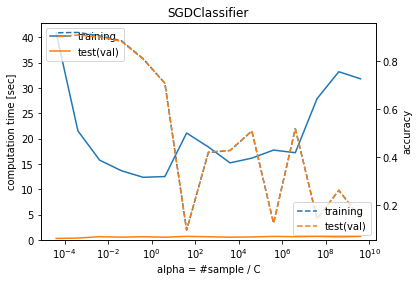

In [15]:
plt.plot(gs.cv_results_['param_clf__alpha'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__alpha'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("alpha = #sample / C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__alpha'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__alpha'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("SGDClassifier")

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [17]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [28]:
clf = SGDClassifier(loss="hinge") # SVM

In [29]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9649122807017544

In [34]:
clf = SGDClassifier(loss="log") # logistic regression

In [35]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193